In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as ctes
from scipy import interpolate
%matplotlib inline

In [51]:
Q = np.array([50.0,100.0,150.0,200.0,250.0,275.0,300.0])/3600.0 # m3/s
H = np.array([53.0,50.0,47.0,42.5,36.0,32.0,27.5])
P_mec = np.array([35.0,38.0,40.5,43.0,45.5,46.5,48])*ctes.hp
rho = 997.0 #kg/m3
g = 9.81 
gamma = rho*g # N/m3

P_h = gamma*Q*H
rend = P_h/P_mec

QH = interpolate.InterpolatedUnivariateSpline(Q, H)
QP_mec = interpolate.InterpolatedUnivariateSpline(Q, P_mec)

/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


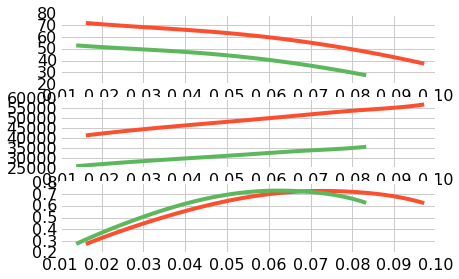

In [131]:
Q_new = np.linspace(50.,300.0,100)/3600
fig, (ax0,ax1,ax_rend) = plt.subplots(nrows=3)   # creates a figure with one axe

ax0.plot(Q,H)
ax0.plot(Q_new,QH(Q_new))
ax1.plot(Q,P_mec)
ax1.plot(Q_new,QP_mec(Q_new))
ax_rend.plot(Q,rend)
ax_rend.plot(Q_new,  gamma*Q_new*QH(Q_new)/QP_mec(Q_new))
fig.show()



/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1011: UserWarning: Duplicate key in file "../presentation.mplstyle", line #10
  (fname, cnt))
/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1011: UserWarning: Duplicate key in file "../presentation.mplstyle", line #11
  (fname, cnt))
/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


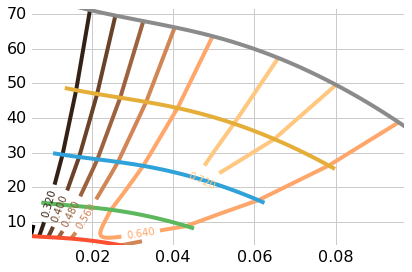

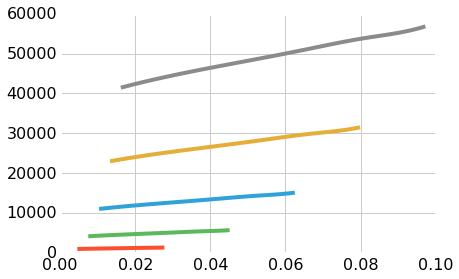

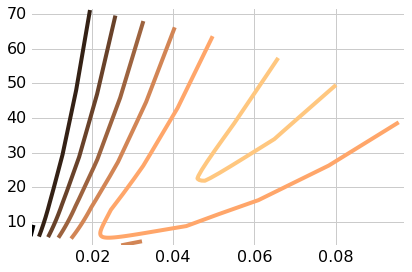

In [130]:
plt.style.use('../presentation.mplstyle')

def pump(Q_new,omega):
    omega_n = 2400.0
    Q = Q_new*omega/omega_n
    H = QH(Q_new)*(omega/omega_n)**2
    P_mec = QP_mec(Q_new)*(omega/omega_n)**3
    P_h = gamma*Q*H
    rend = P_h/(P_mec+200.0)

    return Q,H,P_mec,rend
    

    
fig_qh, (ax_qh) = plt.subplots(nrows=1)   # creates a figure with one axe
fig_qp, (ax_qp) = plt.subplots(nrows=1)   # creates a figure with one axe


Rend = [] 
Q_matrix = [] 
H_matrix = [] 
for item in np.arange(800,3000,500):
    Q,H,P_mec,rend = pump(Q_new, item)   
    Rend += [rend]
    Q_matrix += [Q]
    H_matrix += [H]
    ax_qh.plot(Q,H)
    ax_qp.plot(Q,P_mec)

CS = ax_qh.contour(Q_matrix,H_matrix,Rend,cmap=plt.cm.copper,lw=0.1)
plt.clabel(CS, inline=1, fontsize=10)
fig_qh.show()
fig_qp.show()

ax0.set_xlabel('Caudal ($\sf m^3/s$)')
ax0.set_ylabel('Altura ($\sf m$)')


Q_matrix = np.vstack(Q_matrix)
H_matrix = np.vstack(H_matrix)
Rend = np.vstack(Rend)

fig, (ax_rend) = plt.subplots(nrows=1)   # creates a figure with one axe
ax_rend.contour(Q_matrix,H_matrix,Rend,cmap=plt.cm.copper)




/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


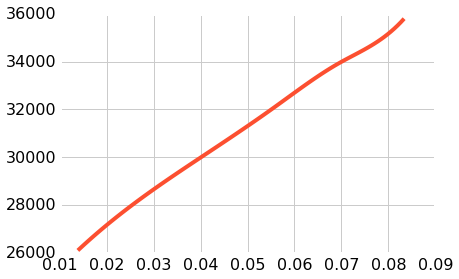

In [134]:
Q_new = np.linspace(50.,300.0,100)/3600
fig, (ax) = plt.subplots(nrows=1)   # creates a figure with one axe

ax.plot(Q_new,QP_mec(Q_new))

fig.show()


In [80]:
import os
print(os.getcwd())

/home/jmmauricio/Documents/public/workspace/e-ipython/hydro


In [34]:
rho = 997.0 #kg/m3
g = 9.81
gamma = rho*g

In [35]:
gamma

9780.57

In [37]:
P_h

array([ 25918510.5,  48902850. ,  68953018.5,  83134845. ,  88025130. ,
        86069016. ,  80689702.5])